In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [7]:
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# The sons of Odin

Odin had six sons, but there is no mention of daughters in the sources. 
To investigate the actual number of children with Bayesian methods we assume that the number of sons

$$
y \sim \text{Bin}(N, p_0)
$$

follows a binomial distribution where $N$ is the number of children of Odin and $p_0 = 0.515$ the boy probability as in Scandinavia today.

In [8]:
y0 = 6
p0 = .515

## Maximum likelihood estimation (MLE)
To obtain an initial estimate for $N$, the density of $y$ is used as the likelihood function for the unknown $N$, that is

$$
L(N \,|\, y_0) = {N\choose y_0} \, p_0^{y_0} \, (1 - p_0)^{N - y_0},
$$

where $y_0 = 6$ is the observed data. The following shows the likelihood function.

__Note:__ The maximum likelihood estimator $N_{ML} = 11$ seems reasonable taking a closer look at the data $p_0$ and $y_0$.

In [9]:
max_N = 50
Ns = np.arange(1, max_N + 1)

lik = lambda N: binom.pmf(y0, N, p0)

In [10]:
# MLE.
mle = Ns[np.argmax(lik(Ns))]
print(f"ML estimation: N = {mle}")

ML estimation: N = 11


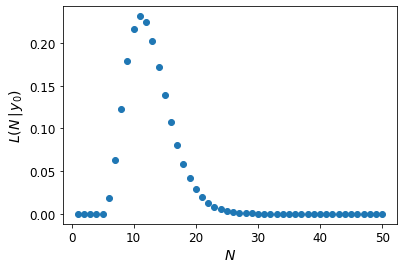

In [11]:
# Plot.
plt.scatter(Ns, lik(Ns))
plt.ylabel(r"$L(N \,|\, y_0)$")
plt.xlabel(r"$N$")
plt.show()

## Posterior distribution and credibility interval

Expressing our guess for the true number of children $N$ via a prior distribution $p_0(N)$, we can use Bayes theorem to calculate the posterior distribution for $N$ given the observed number of sons $y_0 = 6$, that is

$$
p(N \,|\, y_0) \propto p_0(N) \cdot L(N \,|\, y_0).
$$

Furthermore, an $\alpha$ - credibility interval $[c_l, c_r]$ for $N$ can be constructed by choosing $c_l$ as the $(1-\alpha) \,/\, 2$ and $c_r$ as the $(1 + \alpha) \,/\, 2$ quantile of the posterior distirbution $p(N \,|\, y_0)$.

In [13]:
def credibility_interval(pdf, alpha):
    pdf = normalize_pdf(pdf(Ns))
    cdf = np.cumsum(pdf)
    low = Ns[np.argmin(np.abs(cdf - (1 - alpha) / 2))]
    high = Ns[np.argmin(np.abs(cdf - (1 + alpha) / 2))]
    return low, high

### Simple prior

For the first inference we utilize a fairly noninformative (or flat) prior which drops exponentially, namely

$$
p(N) \propto \frac{1}{N + 1}.
$$

In [14]:
normalize_pdf = lambda pdf: pdf / pdf.sum()

prior = lambda N: 1 / (N + 1)
post = lambda N: prior(N) * lik(N)

In [15]:
# 90% credibility interval.
low, high = credibility_interval(post, alpha=.90)
print(f"90% credibility interval for N: [{low}, {high}]")

90% credibility interval for N: [7, 17]


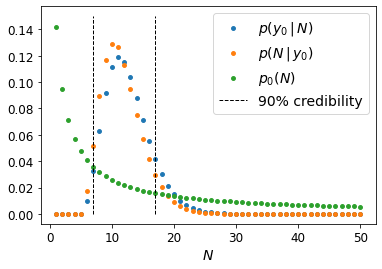

In [16]:
# Plot.
plt.scatter(Ns, normalize_pdf(lik(Ns)), label=r"$p(y_0 \,|\, N)$", s=15)
plt.scatter(Ns, normalize_pdf(post(Ns)), label=r"$p(N \,|\, y_0)$", s=15)
plt.scatter(Ns, normalize_pdf(prior(Ns)), label=r"$p_0(N)$", s=15)
plt.vlines([low, high], 0, 0.15, colors="k", linestyles="dashed", lw=1., label="90% credibility")
plt.xlabel(r"$N$")
plt.legend()
plt.show()


### More informative prior

Now we would like to repeat the experiments using a different (possibly more informative) prior distribution $p_{new}$.
For this purpose we use a function that is constant up until a certain $N_1$, drops quadratically for $N > N_1$, and equals zero for $N = 50$.
The following piece wise defined function

$$
p_{own}(N) = 
\begin{cases} 
      c & N \leq N_1, \\
      a (N - 50)^2 & N1 < N \leq 50,
\end{cases}
$$

with $c, a > 0$ such that $p_{own}$ is a density fits our needs.
We choose $N_1 = 10$, i.e. consider the probability of Odin having between 0 and 10 children to be equal, which can be contemporary, or bad.
More than $N_1 = 10$ children are modelled as increasingly unlikely.

In [18]:
N1 = 10
a = 3 / (N1 - 50) ** 2 / (2 * N1 + 50)
c = a * (N1 - 50) ** 2
new_prior = lambda N: (
    np.where(
        N <= N1,
        c,
        a * (N - 50)**2,
    )
)
new_post = lambda N: new_prior(N) * lik(N)

In [19]:
# 90% credibility interval.
low, high = credibility_interval(new_post, alpha=0.90)
print(f"90% credibility for N with new prior: [{low}, {high}]")

90% credibility for N with new prior: [7, 18]


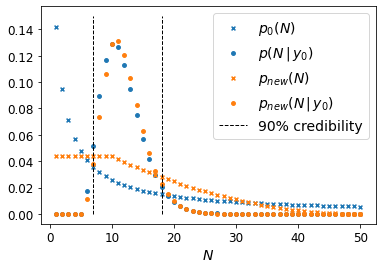

In [20]:
# Plot.
plt.scatter(Ns, normalize_pdf(prior(Ns)), c="C0", label=r"$p_0(N)$", s=15, marker="x")
plt.scatter(Ns, normalize_pdf(post(Ns)), c="C0", label=r"$p(N \,|\, y_0)$", s=15)
plt.scatter(Ns, normalize_pdf(new_prior(Ns)), c="C1", label=r"$p_{new}(N)$", s=15, marker="x")
plt.scatter(Ns, normalize_pdf(new_post(Ns)), c="C1", label=r"$p_{new}(N \,|\, y_0)$", s=15)
plt.vlines([low, high], 0, 0.15, colors="k", linestyles="dashed", lw=1., label="90% credibility")
plt.xlabel(r"$N$")
plt.legend()
plt.show()

## Results

The results do not change very much, the credibility interval has been extended by one to the right and the resulting posterior distributions look almost identical. The posterior distribution is essentially still strongly determined by the binomial distribution of the data, so the prior considerations do not have too much influence. 